# Imbalanced Data by Sampling and Data Augmentation
**Loan Default Prediction**

**https://www.kaggle.com/competitions/playground-series-s4e10/data**

![](images/michelle-kim-R5sNi2Ioazk-unsplash-resized.jpg)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the CSV file
df = pd.read_csv('train.csv')

# use only the train.csv then train/ test split to create a test dataset
# the original test.csv does not contain loan_status label as it was meant for competition  

# Display the first few rows of the data
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Examine the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [3]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


### Count the number of positive cases (bad loans)

In [4]:
df.agg({'loan_status': [lambda x: (x == 1).sum()]})

,loan_status
<lambda>,8350


### Encode categorical values

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

   id  person_age  person_income  person_home_ownership  person_emp_length  \
0   0          37          35000                      3                0.0   
1   1          22          56000                      2                6.0   
2   2          29          28800                      2                8.0   
3   3          30          70000                      3               14.0   
4   4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

### Scatter plot of target vs 2 predictors

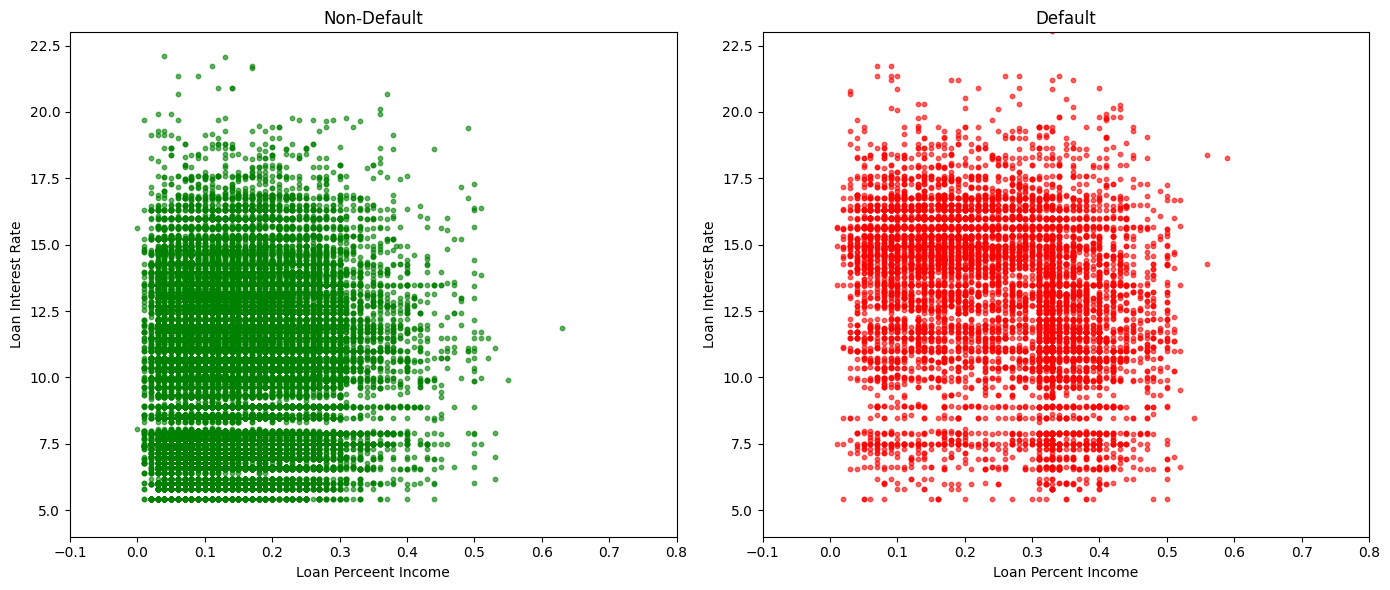

In [6]:
from matplotlib.ticker import ScalarFormatter

# Create two DataFrames based on 'loan_status'
df_0 = df[df['loan_status'] == 0]
df_1 = df[df['loan_status'] == 1]

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 'loan_status' == 0
axes[0].scatter(df_0['loan_percent_income'], df_0['loan_int_rate'], color='green', s=10, alpha=0.6)
axes[0].set_title('Non-Default')
axes[0].set_xlabel('Loan Perceent Income')
axes[0].set_ylabel('Loan Interest Rate')
axes[0].set_xlim(-0.1, 0.8)
axes[0].set_ylim(4, 23)
# axes[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axes[0].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

# Plot for 'loan_status' == 1
axes[1].scatter(df_1['loan_percent_income'], df_1['loan_int_rate'], color='red', s=10, alpha=0.6)
axes[1].set_title('Default')
axes[1].set_xlabel('Loan Percent Income')
axes[1].set_ylabel('Loan Interest Rate')
axes[1].set_xlim(-0.1, 0.8)
axes[1].set_ylim(4, 23)
# axes[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axes[1].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

# Adjust the layout
plt.tight_layout()
plt.show()


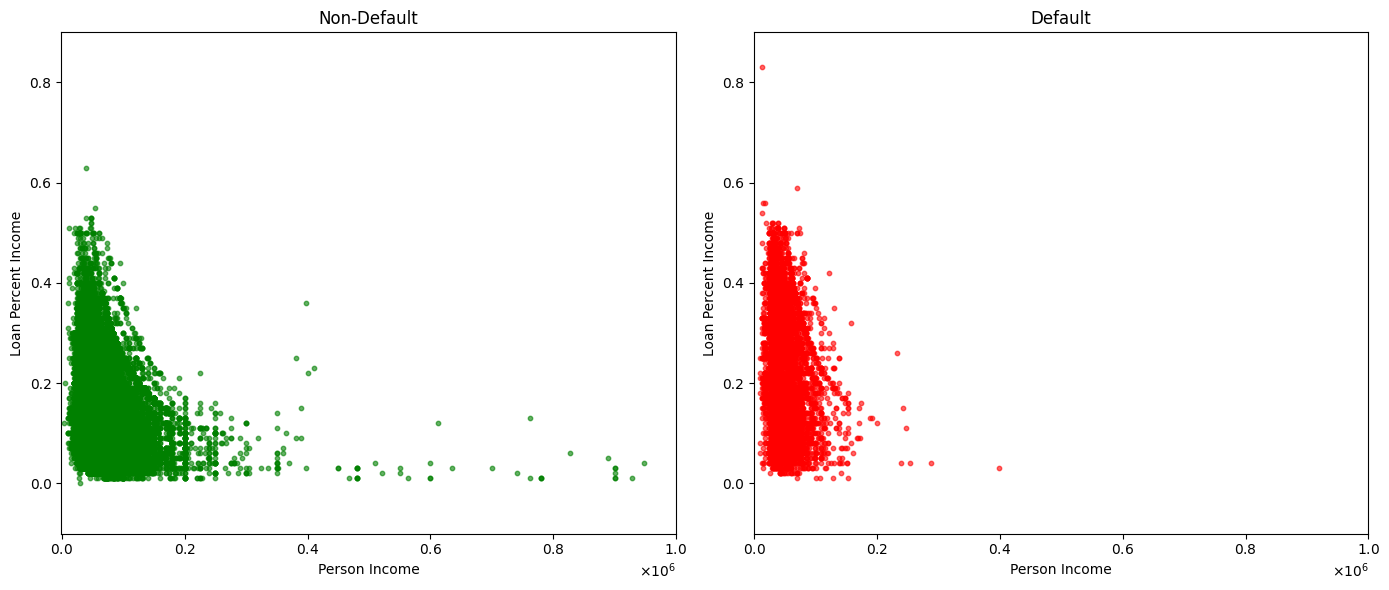

In [7]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 'loan_status' == 0
axes[0].scatter(df_0['person_income'], df_0['loan_percent_income'], color='green', s=10, alpha=0.6)
axes[0].set_title('Non-Default')
axes[0].set_xlabel('Person Income')
axes[0].set_ylabel('Loan Percent Income')
axes[0].set_xlim(-1000, 1000000)
axes[0].set_ylim(-0.1, 0.9)
axes[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

# Plot for 'loan_status' == 1
axes[1].scatter(df_1['person_income'], df_1['loan_percent_income'], color='red', s=10, alpha=0.6)
axes[1].set_title('Default')
axes[1].set_xlabel('Person Income')
axes[1].set_ylabel('Loan Percent Income')
axes[1].set_xlim(-1000, 1000000)
axes[1].set_ylim(-0.1, 0.9)
axes[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

# Adjust the layout
plt.tight_layout()
plt.show()

In [8]:

df.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


### Plot distributions of selected features

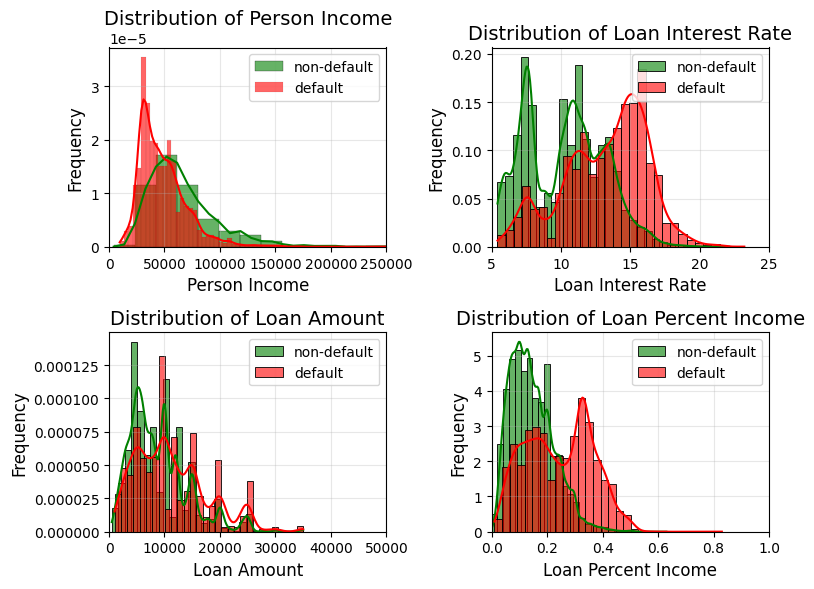

In [9]:
# Assuming the DataFrame `df` is already loaded
# Filter the data based on loan_status
status_0 = df[df['loan_status'] == 0]
status_1 = df[df['loan_status'] == 1]

# Initialize a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
                         
# Define features to plot, titles, and x-axis limits
features = ['person_income', 'loan_int_rate', 'loan_amnt', 'loan_percent_income']
titles = ['Person Income', 'Loan Interest Rate', 'Loan Amount', 'Loan Percent Income']
x_limits = [(0, 250000), (5, 25), (0, 50000), (0, 1)]  # Example x-axis ranges

# Plot distributions
for i, ax in enumerate(axes.flatten()):
    feature = features[i]
    if i == 0: 
        iBins = 100
    else:
        iBins = 30
    sns.histplot(status_0[feature], color='green', label='non-default', kde=True, bins=iBins, alpha=0.6, stat="density", ax=ax)
    sns.histplot(status_1[feature], color='red', label='default', kde=True, bins=iBins, alpha=0.6, stat="density", ax=ax)
    ax.set_title(f'Distribution of {titles[i]}', fontsize=14)
    ax.set_xlabel(titles[i], fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_xlim(x_limits[i])  # Set custom x-axis limits

# Adjust layout
plt.tight_layout()
plt.show()


### Train-test split

In [10]:
from sklearn.model_selection import train_test_split
from collections import Counter

df_all = df.drop(columns=['id','loan_status'])

loan_target = df['loan_status'].values
X_train, X_test, y_train, y_test = \
    train_test_split(df_all, loan_target, test_size=0.2, random_state=42)

print(X_train.info())
print(Counter(y_train).items())

<class 'pandas.core.frame.DataFrame'>
Index: 46916 entries, 14337 to 56422
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  46916 non-null  int64  
 1   person_income               46916 non-null  int64  
 2   person_home_ownership       46916 non-null  int32  
 3   person_emp_length           46916 non-null  float64
 4   loan_intent                 46916 non-null  int32  
 5   loan_grade                  46916 non-null  int32  
 6   loan_amnt                   46916 non-null  int64  
 7   loan_int_rate               46916 non-null  float64
 8   loan_percent_income         46916 non-null  float64
 9   cb_person_default_on_file   46916 non-null  int32  
 10  cb_person_cred_hist_length  46916 non-null  int64  
dtypes: float64(3), int32(4), int64(4)
memory usage: 3.6 MB
None
dict_items([(0, 40208), (1, 6708)])


### Optional code to make data even more imbalanced

In [11]:
# from imblearn.datasets import make_imbalance


# sampling_strategy = {0:180000 ,1: 9000}
# X_train, y_train = make_imbalance(X_train, y_train,
#                               sampling_strategy=sampling_strategy)
# sorted(Counter(y_train).items())

### Bar plot to show imbalanced data

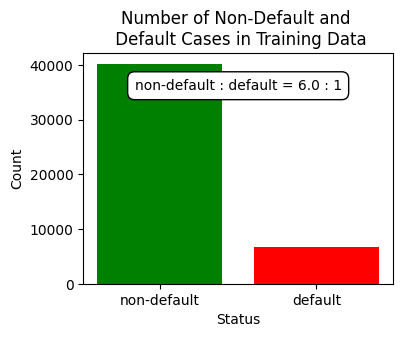

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
counts_dict = dict(zip(unique, counts))

# Convert counts to a list
values = list(counts_dict.values())

# Define labels for the x-axis
labels = ['non-default', 'default']
ratio = values[0]/ values[1]
# Plot the bar chart
plt.figure(figsize=(4, 3))
plt.bar(labels, values, color=['green', 'red'])
plt.title("Number of Non-Default and \n Default Cases in Training Data")
plt.xlabel("Status")
plt.ylabel("Count")

# Add a text box showing the ratio
ratio_text = f"non-default : default = {ratio:.1f} : 1"     # print(f"{a:0,.2f}")
plt.text(0.5, max(values) * 0.9, ratio_text, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Utilities for model comparison

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (cross_val_score, 
                                     RandomizedSearchCV, 
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score,
                             f1_score, 
                             precision_score, 
                             recall_score, 
                             fbeta_score,
                             RocCurveDisplay,
                             precision_recall_curve, 
                            #  average_precision_score,
                             roc_auc_score, 
                             roc_curve, auc)

from sklearn.metrics import confusion_matrix

def clf_model(idx, X, y, X_t, y_t, model_, param_grid_, cv_ = 10, \
              scoring_= "balanced_accuracy"):
    grid_search = GridSearchCV(estimator = model_, \
                               param_grid = param_grid_, cv = cv_, scoring = scoring_)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_t)

    accuracy = accuracy_score(y_t, y_pred)
    precision = precision_score(y_t, y_pred)
    recall = recall_score(y_t, y_pred)
    roc_auc = roc_auc_score(y_t, y_pred)
    f2 = fbeta_score(y_t, y_pred, beta=2)
    f1 = f1_score(y_t, y_pred)
    
    metrics_dict = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'ROC_AUC': [roc_auc],
    'F2_Score': [f2],
    'F1_Score': [f1]
    }

    # Convert the dictionary to a DataFrame with the index as 'Decision Tree'
    metrics_df = pd.DataFrame(metrics_dict, index=[idx])

    return metrics_df, y_pred

import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Base model decision tree from Sci-kit Learn

### Decision Tree from Sci-kit Learn taught in Class

In [14]:
clf_dt = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth' : [7]
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

metrics_df_dt, y_pred_dt = clf_model('DT', X_train, y_train, \
                          X_test, y_test, clf_dt, param_grid_dt)

print(metrics_df_dt)

    Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
DT  0.946457   0.918317  0.677832  0.834009  0.715296  0.779958


False Negatives (FN): 529
Confusion matrix, without normalization
[[1113  529]
 [  99 9988]]


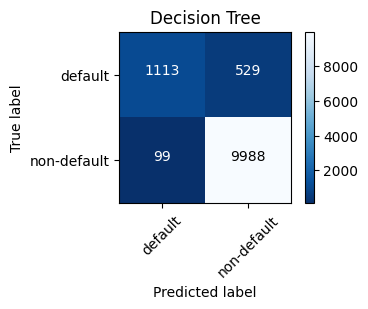

In [15]:
cm =  confusion_matrix(y_test, y_pred_dt, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='Decision Tree')

In [16]:
clf_dt = clf_dt.fit(X_train, y_train) 

In [17]:
import graphviz
from graphviz import Graph
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                     feature_names=df.drop(columns=['id', 'loan_status']).columns,  
                      class_names=df['loan_status'].unique().astype(str),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

# graph.render("max_depth_loan") #################  saved to laptop download folder

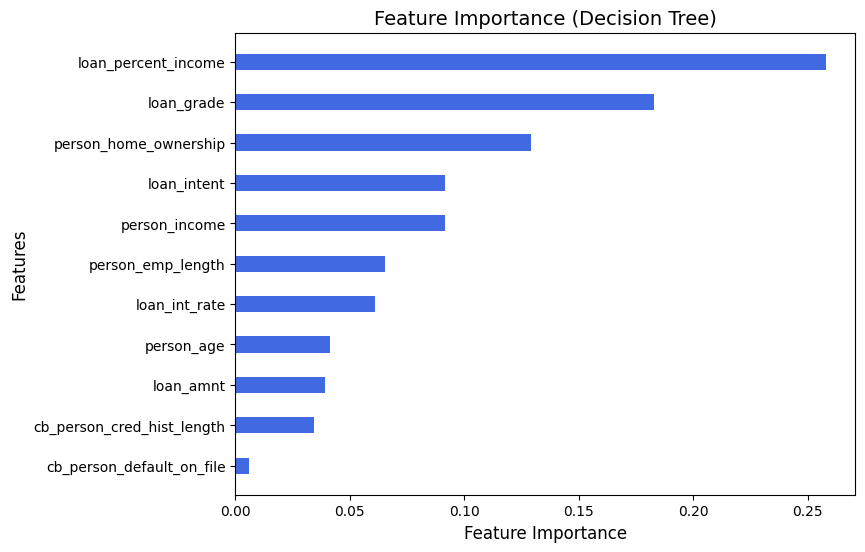

In [22]:
features = df.drop(columns=['id', 'loan_status']).columns
importances = clf_dt.feature_importances_

# Create a DataFrame for easy manipulation
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue', height=0.4)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Decision Tree)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

### XGBoost

![Gradient Boosting Tree](images/XGboost.png)

**XGBoost** is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

It is an ensemble method which consists of sequential weak tree models to fit the gradient of the loss from the previous tree.

         Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
XGBoost  0.951232   0.889374  0.744214  0.864573  0.769328  0.810345
False Negatives (FN): 420
Confusion matrix, without normalization
[[1222  420]
 [ 152 9935]]


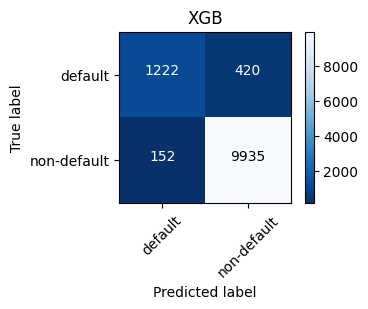

<Figure size 500x400 with 0 Axes>

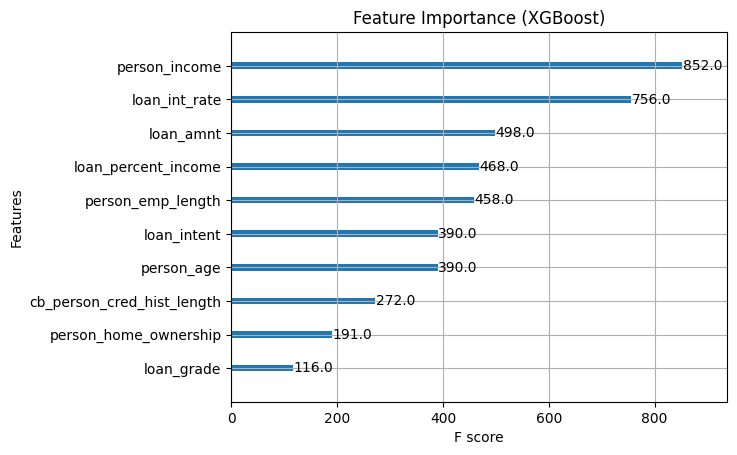

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid_xgb = {
    # 'objective': ['binary:logistic'],
    'max_depth': [7],
    # 'learning_rate': [0.01,  0.2],
    # 'n_estimators': [100, 200, 300],
    # 'eval_metric': ['logloss'],
    }

clf_xgb = XGBClassifier()
metrics_df_xgb, y_pred_xgb = clf_model('XGBoost', X_train, y_train, \
                          X_test, y_test, clf_xgb, param_grid_xgb)

print(metrics_df_xgb)

cm =  confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='XGB')

clf_xgb.fit(X_train, y_train)
plt.figure(figsize=(5, 4))
xgb.plot_importance(clf_xgb, max_num_features=10,title= "Feature Importance (XGBoost)")  # Display the top 10 features
plt.show()

Notice that the least important feature from Decision Tree model is missing in XGBoost. This is because XGBoost automatically performs feature selection in fitting the model.

https://xgboosting.com/xgboost-performs-automatic-feature-selection/

### XGBoost with weighting

![Upweighting](images/upweighting.png)

* When _scale_pos_weight_ is set to a value greater than 1, it effectively increases the importance of the positive class during training. This helps the model pay more attention to the positive examples, which can improve the model's ability to correctly classify the minority class.
* Conversely, if scale_pos_weight is less than 1, it would reduce the emphasis on the positive class.
* The parameter is often set to the ratio of the number of negative samples to positive samples:
  scale_pos_weight = number_of_negative_samples / number_of_positive_samples

                  Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
XGBoost Weighted   0.93725   0.761547  0.803289  0.881172  0.794578  0.781861
False Negatives (FN): 323
Confusion matrix, without normalization
[[1319  323]
 [ 413 9674]]


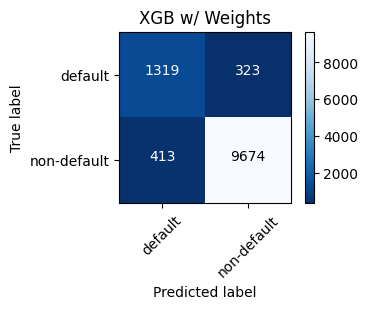

In [ ]:
clf_xgbw = XGBClassifier(scale_pos_weight=ratio)   # set wetight equal to the imbalance ratio
metrics_df_xgbw, y_pred_xgbw = clf_model('XGBoost Weighted', X_train, y_train, \
                          X_test, y_test, clf_xgbw, param_grid_xgb)

print(metrics_df_xgbw)

cm =  confusion_matrix(y_test, y_pred_xgbw, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='XGB w/ Weights')

## Sampling Techniques
![Random Sampling](images/random_sampling.png)

One of the widely adopted imbalance classification techniques for dealing with highly unbalanced datasets is called _resampling_. 

It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information

### Random Over Sampling (ROS)

     Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
ROS  0.938017    0.76491  0.804507  0.882128  0.796263  0.784209
False Negatives (FN): 321
Confusion matrix, without normalization
[[1321  321]
 [ 406 9681]]


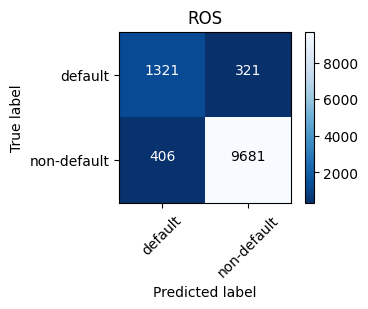

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X_train, y_train)

metrics_df_ros, y_pred_ros = clf_model('ROS', X_ros, y_ros, \
                          X_test, y_test, clf_xgb, param_grid_xgb)

print(metrics_df_ros)

cm =  confusion_matrix(y_test, y_pred_ros, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='ROS')

### Random Under-Sampling (RUS)

     Accuracy  Precision   Recall   ROC_AUC  F2_Score  F1_Score
RUS  0.904681   0.615215  0.85201  0.882632  0.791111  0.714505
False Negatives (FN): 243
Confusion matrix, without normalization
[[1399  243]
 [ 875 9212]]


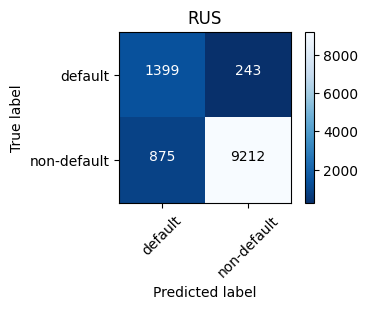

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X_train, y_train)

metrics_df_rus, y_pred_rus = clf_model('RUS', X_rus, y_rus, \
                          X_test, y_test, clf_xgb, param_grid_xgb)

print(metrics_df_rus)

cm =  confusion_matrix(y_test, y_pred_rus, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='RUS')

### SMOTE (Synthetic Minority Oversampling Technique)
![SMOTE](images/smote.png)

SMOTE synthesize elements for the minority class. The algorithm works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

       Accuracy  Precision    Recall  ROC_AUC  F2_Score  F1_Score
SMOTE   0.94569   0.839757  0.756395  0.86645  0.771716  0.795899
False Negatives (FN): 400
Confusion matrix, without normalization
[[1242  400]
 [ 237 9850]]


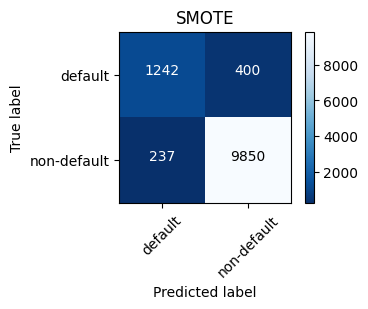

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

metrics_df_smote, y_pred_smote = clf_model('SMOTE', X_smote, y_smote, \
                          X_test, y_test, clf_xgb, param_grid_xgb)

print(metrics_df_smote)

cm =  confusion_matrix(y_test, y_pred_smote, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='SMOTE')


### Tomek-Links
![Tomek-Links](images/tomek_links.png)

Tomek Links is an under-sampling technique that was developed in 1976 by Ivan Tomek. It is one of a modification from Condensed Nearest Neighbors (CNN). It can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data and then remove it.

             Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
Tomek-Links  0.951829   0.878426  0.761267  0.872058   0.78213  0.815661
False Negatives (FN): 392
Confusion matrix, without normalization
[[1250  392]
 [ 173 9914]]


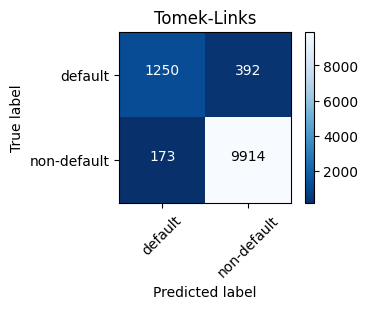

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = "not minority")

X_tl, y_tl = tl.fit_resample(X_train, y_train)

metrics_df_tl, y_pred_tl = clf_model('Tomek-Links', X_tl, y_tl, \
                          X_test, y_test, clf_xgb, param_grid_xgb)

print(metrics_df_tl)

cm =  confusion_matrix(y_test, y_pred_tl, labels=[1, 0])

FN = cm[0, 1]  # Row 0 (actual positive), Column 1 (predicted negative)
print("False Negatives (FN):", FN)
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes= ['default', 'non-default'], \
                      title='Tomek-Links')


In [ ]:
df_results = pd.concat([
    metrics_df_dt,
    metrics_df_xgb,
    metrics_df_xgbw,    
    metrics_df_ros,
    metrics_df_rus,
    metrics_df_tl,
    metrics_df_smote], axis=0)

print(df_results)

                  Accuracy  Precision    Recall   ROC_AUC  F2_Score  F1_Score
DT                0.946372   0.917560  0.677832  0.833959  0.715204  0.779685
XGBoost           0.951232   0.889374  0.744214  0.864573  0.769328  0.810345
XGBoost Weighted  0.937250   0.761547  0.803289  0.881172  0.794578  0.781861
ROS               0.938017   0.764910  0.804507  0.882128  0.796263  0.784209
RUS               0.904681   0.615215  0.852010  0.882632  0.791111  0.714505
Tomek-Links       0.951829   0.878426  0.761267  0.872058  0.782130  0.815661
SMOTE             0.945690   0.839757  0.756395  0.866450  0.771716  0.795899


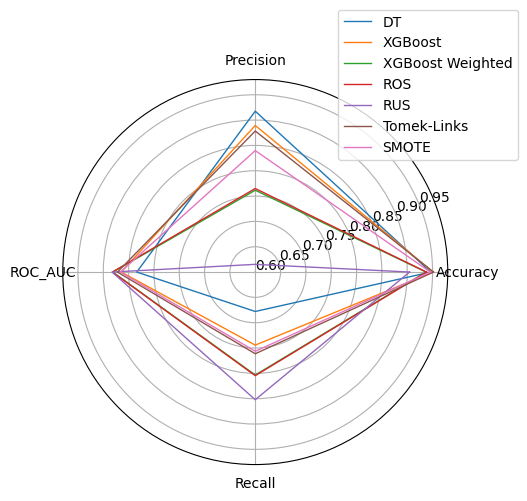

In [ ]:
def plot_radar_chart(df, metrics, origin=0.5):
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Set the origin to 0.5
    ax.set_ylim(origin, 0.98)

    # Plot each model's metrics
    for i in range(len(df)):
        values = df.iloc[i][metrics].tolist()
        values += values[:1]  # Repeat the first value to close the circle
        ax.plot(angles, values, linewidth=1, label=df.index[i])  # Use index as label

    # Add labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Display legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

    plt.show()

metrics = ['Accuracy', 'Precision', 'ROC_AUC', 'Recall']
# Call the function to plot the radar chart
plot_radar_chart(df_results, metrics, origin = 0.6)


## Discussion - Evaluation Metrics

Nearly all models did well on Accuracy and ROC_AUC with minuet differences. 

RUS was the best in predicting bad loan rates, but misses a lot of good loans. 

DT was on the other extreme.

How to evaluate the performance of a model with a target precision-recall balance?

Recall F1 score\
F1 = 1/ (1/Precision + 1/Recall)

We would use F-beta score\
F-beta = (1+beta^2) / (1/Precision + beta^2/Recall)

In [ ]:
from sklearn.metrics import fbeta_score
import numpy as np
import pandas as pd

# Predictions dictionary
y_pred_ = {
    'Decision Tree': y_pred_dt,
    'XGBoost': y_pred_xgb,
    'XGBoost Weighted': y_pred_xgbw,
    'ROS': y_pred_ros,
    'RUS': y_pred_rus,
    'SMOTE': y_pred_smote,
    'Tomek-Links': y_pred_tl
}

# Define the range for beta values
beta_values = np.arange(0, 6, 0.1)  

# Create an empty DataFrame to store the F-beta scores
f_beta_scores = pd.DataFrame(index=beta_values, columns=y_pred_.keys())

# Calculate F-beta scores for each model and beta
for model_name, y_pred in y_pred_.items():
    f_beta_scores[model_name] = [
        fbeta_score(y_test, y_pred, beta=beta) for beta in beta_values
    ]

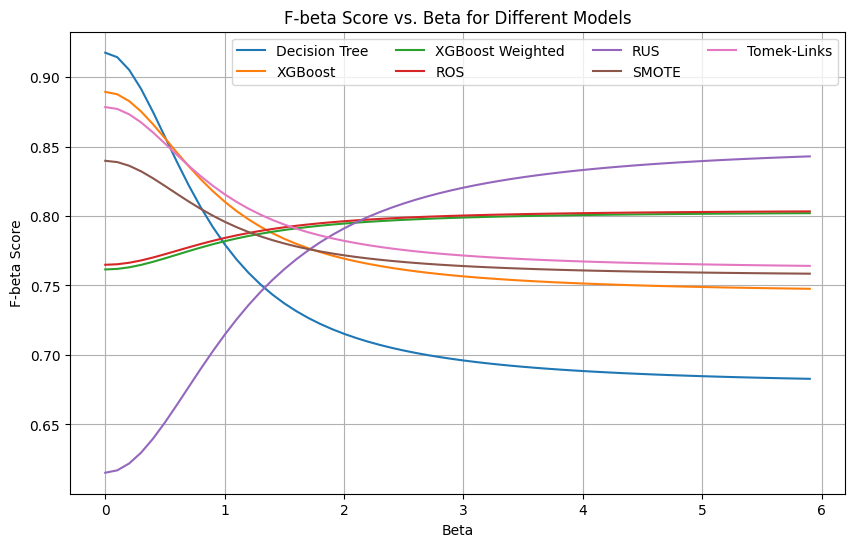

In [ ]:
# Plot the F-beta scores for each model
plt.figure(figsize=(10, 6))
for model_name in f_beta_scores.columns:
    plt.plot(beta_values, f_beta_scores[model_name], label=model_name)

plt.xlabel("Beta")
plt.ylabel("F-beta Score")
plt.title("F-beta Score vs. Beta for Different Models")
plt.legend( loc="upper right", ncol=4)
plt.grid()
plt.show()

# Discussion - Shape of F-beta Curve

- Upward sloping: 
  - RUS
  - ROS
  - XGBoost Weighted
- Downward sloping:
  - DT
  - XGBoost
  - Tomek-Links
  - SMOTE
- Two extremes: RUS an DT

Conjection: the slope of F-beta curve is an indication of how much attention a model/ sampling method pays to the minority class
upward sloping -> minority focused

In [ ]:
# Filter the DataFrame for beta values between 1.5 and 2.0

def avgFbeta(df_score, beta_min, beta_max):
    df_filtered = df_score[(df_score.index >= beta_min) & (f_beta_scores.index <= beta_max)]
    average_scores = df_filtered.mean().to_frame(name='average_f_beta_score').reset_index()
    average_scores.rename(columns={'index': 'model_name'}, inplace=True)
    return average_scores

beta_min = 1.5
beta_max = 1.8
print(avgFbeta(f_beta_scores, beta_min, beta_max))


         model_name  average_f_beta_score
0     Decision Tree              0.729395
1           XGBoost              0.778589
2  XGBoost Weighted              0.791560
3               ROS              0.793403
4               RUS              0.771768
5             SMOTE              0.777262
6       Tomek-Links              0.789757


## What if we tune the weight in XGBw? Does it change the shape of the the F-beta curve?

In [ ]:
lst_ratio = np.arange(4, 7.5, 0.5)
beta_values = np.arange(0, 6, 0.1) 
f_beta_scores_w = pd.DataFrame(index=beta_values) #, columns=y_pred_.keys())

for r in lst_ratio:
    clf_xgbw = XGBClassifier(scale_pos_weight=r)   # set wetight equal to the imbalance ratio
    # clf_xgbw.fit(X_train, y_train)
    _, y_pred_xgbw = clf_model('XGBoost Weighted', X_train, y_train, \
                          X_test, y_test, clf_xgbw, param_grid_xgb)
    f_beta_scores_w[r] = [
        fbeta_score(y_test, y_pred_xgbw, beta=beta, zero_division=1) for beta in beta_values
    ]



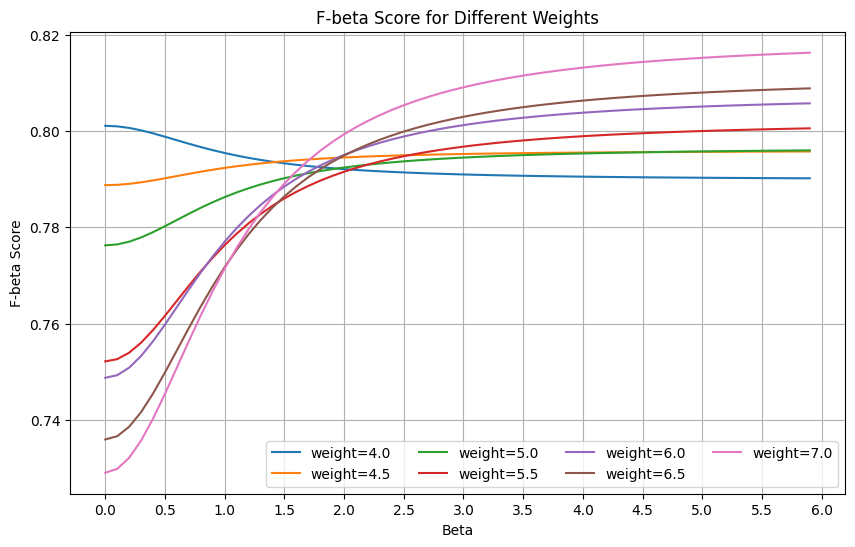

In [ ]:
plt.figure(figsize=(10, 6))
for r in lst_ratio:
    plt.plot(beta_values, f_beta_scores_w[r], label=f'weight={r}')

plt.xlabel('Beta')
plt.ylabel('F-beta Score')
plt.title('F-beta Score for Different Weights')
plt.legend( loc="lower right", ncol=4)
plt.xticks(np.arange(0, 6.5, 0.5))
plt.grid(True)
plt.show()

In [ ]:
print(avgFbeta(f_beta_scores_w, beta_min, beta_max))

   model_name  average_f_beta_score
0         4.0              0.792893
1         4.5              0.794019
2         5.0              0.790989
3         5.5              0.787931
4         6.0              0.790758
5         6.5              0.789375
6         7.0              0.792636


It does! Both endpoints of the curve (precision and recall) follow the order of the weights. However, between beta=1 and beta=2, where our target balance likely resides in, things are tricky. 

An accurate beta value which correlates an ideal precision/ recall balance may be difficult. A flat curve in a beta window may be more desirable than a high averaged beta score in the same window since it allows errors in making a decision what that target balance should be. 